In [2]:
import torch

In [3]:
b, t, c, h, w = 1, 8, 3, 64, 64

In [4]:
videos = torch.ones((b, t, c, h, w))

In [5]:
t = torch.rand(3)
noise = torch.randn_like(videos)


In [6]:
from torchvision.io import read_video
from torch.utils.data import Dataset, DataLoader


class VideoDataset(Dataset):
    def __init__(self, dataset_len, video_paths, labels, transform, read_video_kwargs):
      self.dataset_len = dataset_len
      self.video_paths = video_paths
      self.labels = labels
      self.transform = transform
      self.read_video_kwargs = read_video_kwargs

    def __len__(self):
      return self.dataset_len

    def __getitem__(self, idx):
      video, _, _ = read_video(self.video_paths[idx], **self.read_video_kwargs)
      label = self.labels[idx]

      video = torch.stack([self.transform(frame).float() / 255 for frame in video])
      return video, label

In [13]:
from torchvision import transforms

dataset_len = 1
video_paths = ["./video.MOV"]
labels = ["example"]
transform = transforms.Resize((128, 128))

read_video_kwargs = {
    "pts_unit": "sec",
    "end_pts": 3,
    "output_format": "TCHW"
}

In [14]:
video_dataset = VideoDataset(dataset_len, video_paths, labels, transform, read_video_kwargs)
dataloader = DataLoader(video_dataset, batch_size=64)

In [15]:
from model_copy import Lumiere

In [16]:
from train import train_diffusion_model


# train_diffusion_model(Lumiere((180, 128, 128)), video_dataset, video_dataset, 1, 1, 0.001, 'cpu')

In [17]:
import matplotlib.pyplot as plt

def display_images_from_tensor(video_tensor, num_images=30):
    assert len(video_tensor.shape) == 4, "Tensor should have shape (T, C, H, W)"

    T, C, H, W = video_tensor.shape

    num_images = min(num_images, T)

    fig, axes = plt.subplots(5, 6, figsize=(15, 10))
    axes = axes.flatten()

    for i in range(num_images):
        frame = video_tensor[i].permute(1, 2, 0).numpy()

        ax = axes[i]
        ax.imshow(frame)
        ax.axis('off')

    for j in range(num_images, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [18]:
video, _ = next(iter(dataloader))

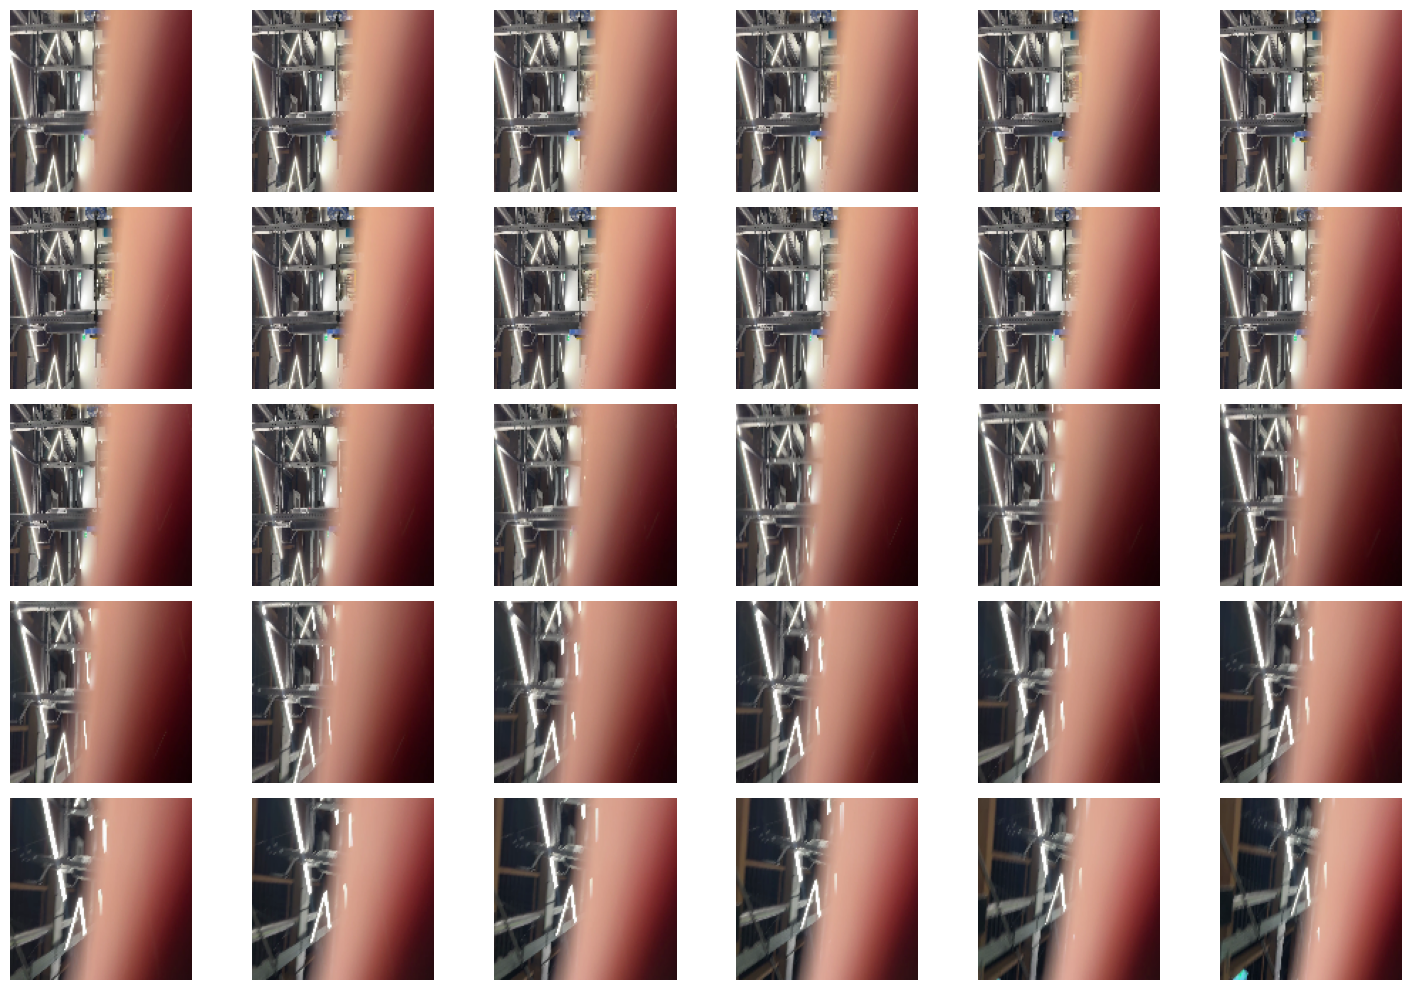

In [19]:
display_images_from_tensor(video.squeeze(0))

In [67]:
from train import NoiseScheduler

noise_scheduler = NoiseScheduler(25, 0.1, 0.9)  # example with 1000 timesteps

tensor([0.5000])
tensor([0.3667])
tensor([0.3333])
tensor([0.4000])
tensor([0.3333])
tensor([0.5667])
tensor([0.5333])
tensor([0.1000])
tensor([0.3667])
tensor([0.6667])
tensor([0.4000])
tensor([0.3333])
tensor([0.5333])
tensor([0.1333])
tensor([0.3667])
tensor([0.1333])
tensor([0.6667])
tensor([0.8000])
tensor([0.2667])
tensor([0.3000])
tensor([0.1000])
tensor([0.2333])
tensor([0.8000])
tensor([0.6333])
tensor([0.6000])


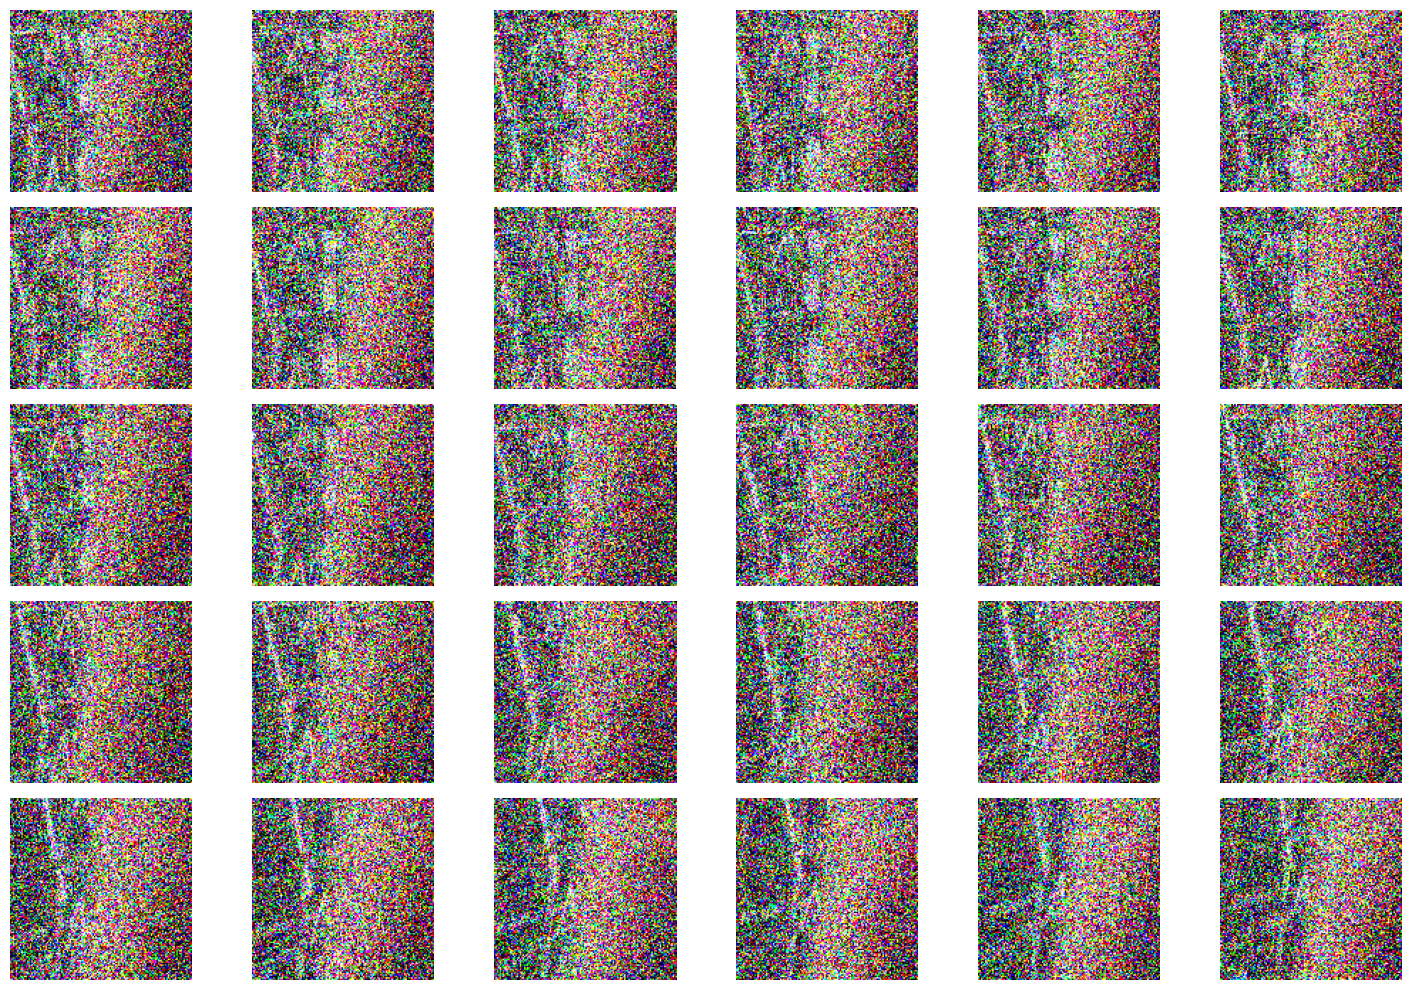

In [70]:
for i in range(25):
    t = torch.rand(1)
    variance = noise_scheduler.get_variance(t)
    print(variance, )
    noise = torch.randn_like(video)
    x_noisy = video + noise * torch.sqrt(variance.view(b, 1, 1, 1, 1))
    
display_images_from_tensor(x_noisy.squeeze(0).clip(0, 1))
